# set up

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Imports

import os
from PIL import Image
import random
import numpy as np
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import math

from visualization_new import *

import wave
import librosa
from unidecode import unidecode
import csv

from IPython.display import Audio
import librosa

# image prep

In [3]:
'''def get_genres(audio_folderpath):
    genre_id = {}

    for genre in os.listdir(audio_folderpath):
        i = 1
        while (genre[:i] in genre_id.values() and i <= len(genre)):
            i += 1
        genre_id[genre] = genre[:i]
    
    return genre_id
'''

In [4]:
'''# audio dict (initial)
def get_audio_dict(audio_folderpath, genre_id):
    audio_dict = {}

    for genre in genre_id:
        files = os.listdir(os.path.join(audio_folderpath, genre))
        count = 0
        # TODO: given an audio dictionary, find what max count for a genre is
        for file in files:
            filepath = os.path.join(audio_folderpath, genre, file)
            id = genre_id[genre] + '{:03d}'.format(count)
            count += 1
            audio_dict[id] = filepath
    
    return audio_dict

def create_csv(csv_filepath, audio_dict):
    with open(csv_filepath, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(list(audio_dict.items()))


# audio dict (after initial)
def get_audio_dict_csv(csv_filepath):
    with open(csv_filepath, 'r') as file:
        reader = csv.reader(file)
        #next(reader)
        audio_dict = {row[0]: row[1] for row in reader}
    
    return audio_dict'''

In [5]:
'''def split_train_test(id_list, ratio):
    random.shuffle(id_list)
    split_index = int(ratio * len(id_list))

    train_set = id_list[:split_index]
    test_set = id_list[split_index:]

    return train_set, test_set

def split_k_fold(id_list, n_batches):
    random.shuffle(id_list)
    batches = []
    index = 0
    batch_size = math.ceil(len(id_list)/n_batches)
    
    for i in range(n_batches - 1):
        batches.append(id_list[index:index+batch_size])
        index += batch_size
    batches.append(id_list[index:len(id_list)-1])

    return batches
'''

In [6]:
'''def get_image_func(image_type):
    if image_type == "spectrogram":
        return wav_to_spectrogram
    elif image_type == "chromagram":
        return wav_to_chromagram
    elif image_type == "mfcc":
        return wav_to_mfcc
    elif image_type == "cochleagram":
        return wav_to_cochleagram
    else:
        return
    
'''

In [ ]:
def to_image(sp)

In [7]:
# Set constants

# Paths
dataset = "small"

if dataset == "small":
    audio_folderpath = "C:/Users/anany/Cambridge/Part II Project/data/audio/small"
    image_folderpath = "C:/Users/anany/Cambridge/Part II Project/data/images/small"
    csv_filepath = "C:/Users/anany/Cambridge/Part II Project/data/small.csv"
if dataset == "large":
    audio_folderpath = "C:/Users/anany/Cambridge/Part II Project/data/audio/large"
    image_folderpath = "C:/Users/anany/Cambridge/Part II Project/data/images/large"
    csv_filepath = "C:/Users/anany/Cambridge/Part II Project/data/large.csv"

image_type = "spectrogram"
to_image = get_image_func(image_type)

# Image options
clip_length = 10
shift_length = 50
resize_dim = 30
save = False

# Model parameters
generate = True
split_ratio = 0.8
k_folds = 5 # Only relevant if cross_validation is True
cross_validation = True
epochs = 6
gen_batch_size = 30 # Only relevant if generate is True
model_batch_size = 32

In [8]:
'''def get_labels(id_list, label_list):
    labels = np.array([label_list.index(x[0]) for x in id_list])
    labels = labels.reshape((len(labels), 1))
    return labels'''

In [9]:
'''def image_split_label(id, audio_dict, clip_length, shift_length, resize_dim, label_list, image_folderpath = None):
    '''
    '''If folderpath is None, convert the audio file. If a folderpath is provided, obtain the images from this path.
    Returns
    -------
    ids: list
    imgs: numpy array
    labels: numpy array'''
    '''
    ids = []
    imgs = None
    labels = None

    # CONVERT/GET
    if image_folderpath == None:
        filepath = audio_dict[id]
        images = to_image(filepath)

    # SPLIT
    for i in range(2):
        if image_folderpath == None:
            img = images[i]
        else:
            filepath = os.path.join(image_folderpath, f"{id}_ch{i}.png")
            assert(os.path.exists(filepath)), f"This filepath does not  exist: {filepath}"
            img = Image.open(filepath)
        img_dict = split(img, id + "_ch" + str(i), clip_length, shift_length, resize_dim)
        
        # Set/update audio sample id list
        ids.extend(list(img_dict.keys()))

        # Set/update array of image arrays
        if imgs is None:
            imgs = np.array(list(img_dict.values()))
        else:
            imgs = np.append(imgs, np.array(list(img_dict.values())), axis = 0)

    # LABEL
    labels = get_labels(ids, label_list=label_list)

    return ids, imgs, labels

    '''

In [10]:
'''def special_character_check(audio_folderpath):
    for genre in os.listdir(audio_folderpath):
        files = os.listdir(os.path.join(audio_folderpath, genre))
        for file in files:
            if file != unidecode(file):
                filepath = os.path.join(audio_folderpath, genre, file)
                if unidecode(filepath) != filepath:
                    print(filepath)'''

# train/test

## without gen

In [11]:
'''def convert_and_save(id_list, audio_dict, image_type, image_folderpath):
    count = 0
    to_image = get_image_func(image_type)
    for id in id_list:
    # CONVERT
        count += 1
        print(f"{count}/{len(id_list)}    {id}", end="")
        filepath = audio_dict[id]
        images = to_image(filepath)

        # SAVE
        for i in range(2):
            images[i].save(os.path.join(image_folderpath, f"{id}_ch{i}.png"))
        print("   DONE")'''

In [12]:
'''def return_data(id_list, audio_dict, clip_length, shift_length, resize_dim, label_list, image_type = None, image_folderpath=None):
    ids = None
    imgs = None
    labels = None


    count = 0
    for id in id_list:

        # Convert to images, split, and get labels
        split_ids, split_imgs, split_labels = image_split_label(id, audio_dict=audio_dict, clip_length=clip_length, shift_length=shift_length, resize_dim=resize_dim, label_list=label_list, image_type=image_type, image_folderpath=image_folderpath)
        
        # Set/update audio sample id list
        if ids is None:
            ids = split_ids
        else:
            ids = np.append(ids, split_ids, axis = 0)

        # Set/update array of image arrays
        if imgs is None:
            imgs = np.array(split_imgs)
        else:
            imgs = np.append(imgs, split_imgs, axis = 0)

        # Set/update array of image labels
        if labels is None:
            labels = split_labels
        else:
            labels = np.append(labels, split_labels, axis = 0)

        count += 1
    
    # Shuffle
    indices = random.sample(range(len(ids)), len(ids))
    ids = ids[indices]
    imgs = imgs[indices]
    labels = labels[indices]
    
    return ids, imgs, labels'''

In [13]:
'''def createModel(input_shape, type=1):
    if type == 1:
        model = models.Sequential()
        model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Conv2D(64, (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Conv2D(64, (3, 3), activation='relu'))

        model.add(layers.Flatten())
        model.add(layers.Dense(64, activation='relu'))
        model.add(layers.Dense(5))
    
    return model'''

'''def createModel2():
    model = models.Sequential()
    # The first two layers with 32 filters of window size 3x3
    #model.add(models.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train[0].shape))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=x_train[0].shape))
    
    model.add(models.Conv2D(32, (3, 3), activation='relu'))
    model.add(models.MaxPooling2D(pool_size=(2, 2)))
    model.add(models.Dropout(0.25))

    model.add(models.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(models.Conv2D(64, (3, 3), activation='relu'))
    model.add(models.MaxPooling2D(pool_size=(2, 2)))
    model.add(models.Dropout(0.25))

    model.add(models.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(models.models.Conv2D(64, (3, 3), activation='relu'))
    model.add(models.MaxPooling2D(pool_size=(2, 2)))
    model.add(models.Dropout(0.25))

    model.add(models.Flatten())
    model.add(models.Dense(512, activation='relu'))
    model.add(models.Dropout(0.5))
    model.add(models.Dense(models.nClasses, activation='softmax'))
    
    return model'''

"def createModel2():\n    model = models.Sequential()\n    # The first two layers with 32 filters of window size 3x3\n    #model.add(models.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train[0].shape))\n    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=x_train[0].shape))\n    \n    model.add(models.Conv2D(32, (3, 3), activation='relu'))\n    model.add(models.MaxPooling2D(pool_size=(2, 2)))\n    model.add(models.Dropout(0.25))\n\n    model.add(models.Conv2D(64, (3, 3), padding='same', activation='relu'))\n    model.add(models.Conv2D(64, (3, 3), activation='relu'))\n    model.add(models.MaxPooling2D(pool_size=(2, 2)))\n    model.add(models.Dropout(0.25))\n\n    model.add(models.Conv2D(64, (3, 3), padding='same', activation='relu'))\n    model.add(models.models.Conv2D(64, (3, 3), activation='relu'))\n    model.add(models.MaxPooling2D(pool_size=(2, 2)))\n    model.add(models.Dropout(0.25))\n\n    model.add(models.Flatten())\n    model.add(models.

In [14]:
genre_id = get_genres(audio_folderpath)
genre_list = list(genre_id.keys())
label_list = [genre_id[genre] for genre in genre_list]

if save:
    audio_dict = get_audio_dict(audio_folderpath, genre_id) # TODO: CHANGE TO MAKE??
    all_song_ids = list(audio_dict.keys())
    convert_and_save(all_song_ids, audio_dict=audio_dict, image_type=image_type, image_folderpath=image_folderpath)
    create_csv(csv_filepath=csv_filepath, audio_dict=audio_dict)

else:
    audio_dict = get_audio_dict_csv(csv_filepath=csv_filepath)
    all_song_ids = list(audio_dict.keys())

In [15]:
if not cross_validation and not generate:
    train_song_ids, val_song_ids = split_train_test(id_list=all_song_ids, ratio=split_ratio)
    train_clip_ids, x_train, y_train = return_data(train_song_ids, audio_dict=audio_dict, clip_length=clip_length, shift_length=shift_length, resize_dim=resize_dim, label_list=label_list, image_folderpath=image_folderpath)
    val_clip_ids, x_val, y_val = return_data(val_song_ids, audio_dict=audio_dict, clip_length=clip_length, shift_length=shift_length, resize_dim=resize_dim, label_list=label_list, image_folderpath=image_folderpath)

    model = createModel(type=1, input_shape=x_train[0].shape)

    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=epochs, 
                        validation_data=(x_val, y_val))

    test_clip_confusion = np.zeros((len(label_list), len(label_list)))

    test_song_ids = val_song_ids
    test_clip_ids = val_clip_ids
    test_clip_pred_probs = model.predict(x_val)
    test_clip_pred_classes = test_clip_pred_probs.argmax(axis=1)
    test_clip_actual_classes = y_val.T[0]
    for i in range(len(test_clip_pred_classes)):
        test_clip_confusion[test_clip_pred_classes[i]][test_clip_actual_classes[i]] += 1
    
    norm_test_clip_confusion = np.zeros((len(label_list), len(label_list)))
    for i in range(len(label_list)):
        norm_test_clip_confusion[:, i] = test_clip_confusion[:, i]/sum(test_clip_confusion[:, i])

    test_clip_vote_array = np.zeros((len(test_clip_ids), len(label_list)))
    test_clip_vote_array += np.eye(5)[test_clip_pred_classes]
    #test_votes = (test_clip_ids, test_clip_vote_array)


In [16]:
if cross_validation and not generate:
    train_val_song_ids, test_song_ids = split_train_test(all_song_ids, split_ratio)
    batches = split_k_fold(train_val_song_ids, k_folds)

    loss = []
    accuracy = []
    val_loss = []
    val_accuracy = []

    val_clip_confusion = np.zeros((len(label_list), len(label_list)))
    norm_val_clip_confusion = np.zeros((len(label_list), len(label_list)))
    val_clip_vote_ids = []
    val_clip_vote_array = []


    test_clip_confusion = np.zeros((len(label_list), len(label_list)))
    norm_test_clip_confusion = np.zeros((len(label_list), len(label_list)))

    test_clip_ids, x_test, y_test = return_data(test_song_ids, audio_dict=audio_dict, clip_length=clip_length, shift_length=shift_length, resize_dim=resize_dim, label_list=label_list, image_folderpath=image_folderpath)

    test_clip_vote_ids = test_clip_ids
    test_clip_vote_array = np.zeros((len(test_clip_ids), len(label_list)))
    

    for b in range(len(batches)):

        # Get data
        if b != len(batches) - 1:
            train_song_ids = batches[0:b] + batches[b+1:]
        else:
            train_song_ids = batches[:-1]
        
        train_song_ids = [item for batch in train_song_ids for item in batch]
        val_song_ids = batches[b]

        train_clip_ids, x_train, y_train = return_data(train_song_ids, audio_dict=audio_dict, clip_length=clip_length, shift_length=shift_length, resize_dim=resize_dim, label_list=label_list, image_folderpath=image_folderpath)
        val_clip_ids, x_val, y_val = return_data(val_song_ids, audio_dict=audio_dict, clip_length=clip_length, shift_length=shift_length, resize_dim=resize_dim, label_list=label_list, image_folderpath=image_folderpath)


        # Create model
        model = createModel(type=1, input_shape=x_train[0].shape)

        model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics=['accuracy'])
        
        # Train model
        history = model.fit(x_train, y_train, epochs=epochs, 
                            validation_data=(x_val, y_val))
        
        # Get results
        loss.append(np.array(history.history['loss']))
        accuracy.append(np.array(history.history['accuracy']))
        val_loss.append(np.array(history.history['val_loss']))
        val_accuracy.append(np.array(history.history['val_accuracy']))

        # Validation classification results
        val_clip_pred_probs = model.predict(x_val)
        val_clip_pred_classes = val_clip_pred_probs.argmax(axis=1)
        val_actual = y_val.T[0]
        for i in range(len(val_clip_pred_classes)):
            val_clip_confusion[val_clip_pred_classes[i]][val_actual[i]] += 1
        val_clip_vote_ids.append(val_clip_ids)
        val_clip_vote_array.append(np.eye(len(label_list))[val_clip_pred_classes])
        

        # Test classification results
        test_clip_pred_probs = model.predict(x_test)
        test_clip_pred_classes = test_clip_pred_probs.argmax(axis=1)
        test_clip_actual_classes = y_test.T[0]
        for i in range(len(test_clip_pred_classes)):
            test_clip_confusion[test_clip_pred_classes[i]][test_clip_actual_classes[i]] += 1
        test_clip_vote_array += np.eye(len(label_list))[test_clip_pred_classes]

    loss = np.array(loss)
    accuracy = np.array(accuracy)
    val_loss = np.array(val_loss)
    val_accuracy = np.array(val_accuracy)

    val_clip_vote_ids = np.concatenate(val_clip_vote_ids, axis=0)
    val_clip_vote_array = np.vstack(val_clip_vote_array)

    for i in range(len(label_list)):
        norm_val_clip_confusion[:, i] = val_clip_confusion[:, i]/sum(val_clip_confusion[:, i])
        norm_test_clip_confusion[:, i] = test_clip_confusion[:, i]/sum(test_clip_confusion[:, i])

In [17]:
# accumulate for crossval, same thing for gen

## with gen

In [18]:
'''def generate_data(id_list, audio_dict, clip_length, shift_length, resize_dim, label_list, image_type = None, image_folderpath = None, gen_batch_size = 1, model_batch_size = None, mode = "train"):
    '''
    '''Parameters
    ----------
    id_list
        List of song IDs to be converted into images

    folderpath
        Path sa
    
    n
        Number of songs to convert each iteration
    
    mode
        "generate" or "return"

    Returns
    -------
    imgs
        Arrays of converted images

    labels
        Respective labels for converted images in imgs'''

    '''
    out_ids = []
    out_imgs = None
    out_labels = None
    n_count = 0
    id_count = 0

    if mode == "train":
    
        while True:
                
            '''
            # convert 1 song
            # update out_... values
            # update bigcount and smallcount
            # if smallcount mod n is 0:
                # shuffle all 3
                # update appropriate id list
                # yield id and label values
                # set everything to none
            
            # if bigcount == len(idlist):
                # count = 0
                # shuffle list?
            '''

            # convert 1 song
            id = id_list[id_count]
            #print(id_count, id)
            
            new_ids, new_imgs, new_labels = image_split_label(id, audio_dict=audio_dict, clip_length=clip_length, shift_length=shift_length, resize_dim=resize_dim, label_list=label_list, image_type=image_type, image_folderpath=image_folderpath)

            out_ids.extend(new_ids)

            if out_imgs is None:
                out_imgs = new_imgs
                out_labels = new_labels
            else:
                out_imgs = np.append(out_imgs, new_imgs, axis=0)
                out_labels = np.append(out_labels, new_labels, axis=0)

            # update bigcount and smallcount
            n_count += 1
            id_count += 1

            #print(id_count, id)

            if (n_count % gen_batch_size == 0) or (id_count == len(id_list)):
                assert(len(out_ids) == len(out_imgs) == len(out_labels)), "Something went wrong when generating, the dimensions of ids, imgs, and labels do not match." # sanity check
                perm = np.random.permutation(len(out_ids))
                out_imgs = out_imgs[perm]
                out_labels = out_labels[perm]
                if model_batch_size is None:
                    yield out_imgs, out_labels
                else:
                    while len(out_labels) >= model_batch_size:
                        yield out_imgs[:model_batch_size], out_labels[:model_batch_size]
                        out_imgs = out_imgs[model_batch_size:]
                        out_labels = out_labels[model_batch_size:]

                out_ids = []
                out_imgs = None
                out_labels = None
            
                if id_count == len(id_list):
                    id_count = 0
                    n_count = 0
                    random.shuffle(id_list)

    if mode == "test":
        # TODO return just images without shuffling
        while id_count < len(id_list):
            # convert 1 song
            id = id_list[id_count]
            print(id_count, id)
            
            new_ids, new_imgs, new_labels = image_split_label(id, image_type=image_type, image_folderpath=image_folderpath, audio_dict=audio_dict, clip_length=clip_length, shift_length=shift_length, resize_dim=resize_dim, label_list=label_list)

            if out_imgs is None:
                out_imgs = new_imgs
            else:
                out_imgs = np.append(out_imgs, new_imgs, axis=0)

            n_count += 1
            id_count += 1

            if n_count % gen_batch_size == 0:
                yield out_imgs

                out_imgs = None                
            
            if id_count == len(id_list):
                if out_imgs is not None:
                    yield out_imgs
    '''

In [19]:
'''def get_clip_ids(id_list, audio_dict, clip_length, shift_length):
    clip_id_list = []
    for id in id_list:
        filepath = audio_dict[id]
        new_ids = []
        with wave.open(filepath, "rb") as wav_file:
            frame_count = wav_file.getnframes()
            sample_rate = wav_file.getframerate()

            audio_len = frame_count/sample_rate
        for i in range(2):
            left = 0.
            right = left + clip_length
            while right <= audio_len:
                new_id = f"{id}_ch{i}_{left}_{right}"
                new_ids.append(new_id)
                left += shift_length
                right += shift_length
        clip_id_list = clip_id_list + new_ids
    
    return clip_id_list
'''

In [21]:
if not cross_validation and generate:       # setup train/test, 

    train_song_ids, val_song_ids = split_train_test(id_list=all_song_ids, ratio=split_ratio)

    train_clip_set_len = len(get_clip_ids(train_song_ids, audio_dict=audio_dict, clip_length=clip_length, shift_length=shift_length))
    val_clip_set_len = len(get_clip_ids(val_song_ids, audio_dict=audio_dict, clip_length=clip_length, shift_length=shift_length))


    train_func = generate_data(train_song_ids, image_folderpath=image_folderpath, gen_batch_size=gen_batch_size, model_batch_size=model_batch_size, mode="train", audio_dict=audio_dict, clip_length=clip_length, shift_length=shift_length, resize_dim=resize_dim, label_list=label_list)
    val_func = generate_data(val_song_ids, image_folderpath=image_folderpath, gen_batch_size=gen_batch_size, model_batch_size=model_batch_size, mode="train", audio_dict=audio_dict, clip_length=clip_length, shift_length=shift_length, resize_dim=resize_dim, label_list=label_list)
    
    input_shape = (resize_dim, resize_dim, 1)

    model = createModel(input_shape=input_shape)
    # TODO: what if not resized -- how to get dimensions of an 

    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0025),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

    history = model.fit(train_func,
                        steps_per_epoch=int(train_clip_set_len/model_batch_size),
                                epochs=epochs,
                                validation_data=val_func,
                                validation_steps=int(val_clip_set_len/model_batch_size),
                                shuffle=True,
                                batch_size=model_batch_size)
    
    test_func = generate_data(val_song_ids, image_folderpath=image_folderpath, gen_batch_size=gen_batch_size, model_batch_size=model_batch_size, mode="test", audio_dict=audio_dict, clip_length=clip_length, shift_length=shift_length, resize_dim=resize_dim, label_list=label_list)
    test_clip_pred_probs = model.predict(test_func)
    test_clip_pred_classes = test_clip_pred_probs.argmax(axis=1)

    test_clip_ids = get_clip_ids(val_song_ids, audio_dict=audio_dict, clip_length=clip_length, shift_length=shift_length) # this is correct, val_song_ids is test_song_ids
    test_clip_actual_classes = get_labels(test_clip_ids, label_list=label_list)

    test_clip_confusion = np.zeros((len(label_list), len(label_list)))
    for i in range(len(test_clip_pred_classes)):
        test_clip_confusion[test_clip_pred_classes[i]][test_clip_actual_classes[i]] += 1
    
    norm_test_clip_confusion = np.zeros((len(label_list), len(label_list)))
    for i in range(len(label_list)):
        norm_test_clip_confusion[:, i] = test_clip_confusion[:, i]/sum(test_clip_confusion[:, i])

    test_clip_vote_array = np.zeros((len(test_clip_ids), len(label_list)))
    test_clip_vote_array += np.eye(5)[test_clip_pred_classes]

    test_song_ids = val_song_ids
    #test_votes = (test_clip_ids, test_vote_array)

In [22]:
if cross_validation and generate:       # setup train/test, 

    train_val_song_ids, test_song_ids = split_train_test(all_song_ids, split_ratio)
    batches = split_k_fold(train_val_song_ids, k_folds)

    loss = []
    accuracy = []
    val_loss = []
    val_accuracy = []
    val_clip_confusion = np.zeros((len(label_list), len(label_list)))
    norm_val_clip_confusion = np.zeros((len(label_list), len(label_list)))

    val_clip_vote_ids = []
    val_clip_vote_array = []



    test_clip_confusion = np.zeros((len(label_list), len(label_list)))
    norm_test_clip_confusion = np.zeros((len(label_list), len(label_list)))
    #test_ids, x_test, y_test = return_data(test_id_list, audio_dict=audio_dict, clip_length=clip_length, shift_length=shift_length, resize_dim=resize_dim, label_list=label_list, image_folderpath=image_folderpath)
    test_clip_ids = get_clip_ids(test_song_ids, audio_dict=audio_dict, clip_length=clip_length, shift_length=shift_length)
    test_clip_actual_classes = get_labels(test_clip_ids, label_list=label_list)

    test_clip_vote_ids = test_clip_ids
    test_clip_vote_array = np.zeros((len(test_clip_ids), len(label_list)))
 
    
    for b in range(len(batches)):

        # Get data
        if b != len(batches) - 1:
            train_song_ids = batches[0:b] + batches[b+1:]
        else:
            train_song_ids = batches[:-1]
        
        train_song_ids = [item for batch in train_song_ids for item in batch]
        val_song_ids = batches[b]

        train_func = generate_data(train_song_ids, image_folderpath=image_folderpath, gen_batch_size=gen_batch_size, model_batch_size=model_batch_size, mode="train", audio_dict=audio_dict, clip_length=clip_length, shift_length=shift_length, resize_dim=resize_dim, label_list=label_list)
        val_func = generate_data(val_song_ids, image_folderpath=image_folderpath, gen_batch_size=gen_batch_size, model_batch_size=model_batch_size, mode="train", audio_dict=audio_dict, clip_length=clip_length, shift_length=shift_length, resize_dim=resize_dim, label_list=label_list)

        train_clip_ids = get_clip_ids(train_song_ids, audio_dict=audio_dict, clip_length=clip_length, shift_length=shift_length)
        val_clip_ids = get_clip_ids(val_song_ids, audio_dict=audio_dict, clip_length=clip_length, shift_length=shift_length)
        
        train_clip_set_len = len(train_clip_ids)
        val_clip_set_len = len(val_clip_ids)


        input_shape = (resize_dim, resize_dim, 1)

        model = createModel(input_shape=input_shape)

        model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0005),
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics=['accuracy'])

        history = model.fit(train_func,
                            steps_per_epoch=int(train_clip_set_len/model_batch_size),
                                    epochs=epochs,
                                    validation_data=val_func,
                                    validation_steps=int(val_clip_set_len/model_batch_size),
                                    shuffle=True,
                                    batch_size=model_batch_size)
     
        # Get results
        loss.append(np.array(history.history['loss']))
        accuracy.append(np.array(history.history['accuracy']))
        val_loss.append(np.array(history.history['val_loss']))
        val_accuracy.append(np.array(history.history['val_accuracy']))

        # Validation classification results
        val_pred_func = generate_data(val_song_ids, image_folderpath=image_folderpath, gen_batch_size=gen_batch_size, model_batch_size=model_batch_size, mode="test", audio_dict=audio_dict, clip_length=clip_length, shift_length=shift_length, resize_dim=resize_dim, label_list=label_list)
        val_clip_pred_probs = model.predict(val_pred_func)
        val_clip_pred_classes = val_clip_pred_probs.argmax(axis=1)

        val_clip_actual_classes = get_labels(val_clip_ids, label_list=label_list)
        for i in range(len(val_clip_pred_classes)):
            val_clip_confusion[val_clip_pred_classes[i]][val_clip_actual_classes[i]] += 1
        
        val_clip_vote_ids.append(val_clip_ids)
        val_clip_vote_array.append(np.eye(len(label_list))[val_clip_pred_classes])

        # Test classification results
        test_clip_pred_func = generate_data(test_song_ids, image_folderpath=image_folderpath, gen_batch_size=gen_batch_size, model_batch_size=model_batch_size, mode="test", audio_dict=audio_dict, clip_length=clip_length, shift_length=shift_length, resize_dim=resize_dim, label_list=label_list)
        test_clip_pred_probs = model.predict(test_clip_pred_func)
        test_clip_pred_classes = test_clip_pred_probs.argmax(axis=1)
        
        for i in range(len(test_clip_pred_classes)):
            test_clip_confusion[test_clip_pred_classes[i]][test_clip_actual_classes[i]] += 1
        test_clip_vote_array += np.eye(len(label_list))[test_clip_pred_classes]

    loss = np.array(loss)
    accuracy = np.array(accuracy)
    val_loss = np.array(val_loss)
    val_accuracy = np.array(val_accuracy)

    val_clip_vote_ids = np.concatenate(val_clip_vote_ids, axis=0)
    val_clip_vote_array = np.vstack(val_clip_vote_array)

    for i in range(len(label_list)):
        norm_val_clip_confusion[:, i] = val_clip_confusion[:, i]/sum(val_clip_confusion[:, i])
        norm_test_clip_confusion[:, i] = test_clip_confusion[:, i]/sum(test_clip_confusion[:, i])


Epoch 1/6
7/7 [==============================] - 7s 1s/step - loss: 1.6092 - accuracy: 0.0000e+00 - val_loss: 1.6028 - val_accuracy: 0.0000e+00
Epoch 2/6
7/7 [==============================] - 11s 992ms/step - loss: 1.6090 - accuracy: 0.0000e+00 - val_loss: 1.6041 - val_accuracy: 0.0000e+00
Epoch 3/6
7/7 [==============================] - 11s 1s/step - loss: 1.6089 - accuracy: 0.0000e+00 - val_loss: 1.6047 - val_accuracy: 0.0000e+00
Epoch 4/6
7/7 [==============================] - 11s 1s/step - loss: 1.6099 - accuracy: 0.0000e+00 - val_loss: 1.6053 - val_accuracy: 0.0000e+00
Epoch 5/6
7/7 [==============================] - 11s 980ms/step - loss: 1.6092 - accuracy: 0.0000e+00 - val_loss: 1.6041 - val_accuracy: 0.0000e+00
Epoch 6/6
7/7 [==============================] - 11s 1s/step - loss: 1.6083 - accuracy: 0.0000e+00 - val_loss: 1.6057 - val_accuracy: 0.0000e+00
0 p000
1 j004
2 p003
3 h001
4 p005
5 p007
6 j005
7 r001
1/1 [==============================] - 2s 2s/step
0 h004
1 b009
2 r00

C:\Users\anany\AppData\Local\Temp\ipykernel_22588\3195583487.py:102: RuntimeWarning: invalid value encountered in divide
  norm_test_clip_confusion[:, i] = test_clip_confusion[:, i]/sum(test_clip_confusion[:, i])


In [23]:
'''def get_confusion_matrix(pred_classes, actual_classes, num_classes):
    output = np.zeros(((num_classes), (num_classes)))
    for i in range(len(pred_classes)):
        output[pred_classes[i]][actual_classes[i]] += 1
    
    return output'''




In [24]:
'''    val_clip_vote_ids = np.concatenate(val_clip_vote_ids, axis=0)
    val_clip_vote_array = np.vstack(val_clip_vote_array)'''

'    val_clip_vote_ids = np.concatenate(val_clip_vote_ids, axis=0)\n    val_clip_vote_array = np.vstack(val_clip_vote_array)'

In [25]:
#get_confusion_matrix(val_clip_vote_ids, val_clip_vote_array, label_list)

array([[11., 15.,  3.,  7., 16.],
       [31., 14., 25.,  8., 23.],
       [ 0.,  0.,  0.,  1.,  4.],
       [ 9., 11., 11., 12.,  3.],
       [ 9., 16., 29., 36.,  6.]])

In [26]:
val_clip_confusion

array([[11., 15.,  3.,  7., 16.],
       [31., 14., 25.,  8., 23.],
       [ 0.,  0.,  0.,  1.,  4.],
       [ 9., 11., 11., 12.,  3.],
       [ 9., 16., 29., 36.,  6.]])

In [27]:
'''get_confusion_matrix(val_clip_pred_classes, val_clip_actual_classes, len(label_list))'''

'get_confusion_matrix(val_clip_pred_classes, val_clip_actual_classes, len(label_list))'

In [28]:
val_clip_confusion

array([[11., 15.,  3.,  7., 16.],
       [31., 14., 25.,  8., 23.],
       [ 0.,  0.,  0.,  1.,  4.],
       [ 9., 11., 11., 12.,  3.],
       [ 9., 16., 29., 36.,  6.]])

# graphs

In [ ]:
'''def get_confusion_matrix(vote_ids, vote_array, label_list):
    output = np.zeros((len(label_list), len(label_list)))
    for i in range(len(vote_ids)):
        id = vote_ids[i]
        actual_class = id[0]
        actual_index = label_list.index(actual_class)
        output[:, actual_index] += vote_array[i]

    return output'''

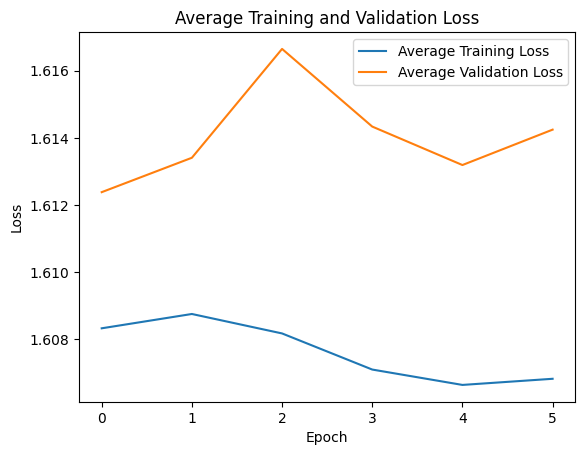

In [29]:
# Loss Function

if not cross_validation:
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


if cross_validation:
    plt.plot(sum(loss)/len(loss), label='Average Training Loss')
    plt.plot(sum(val_loss)/len(loss), label='Average Validation Loss')
    plt.title('Average Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

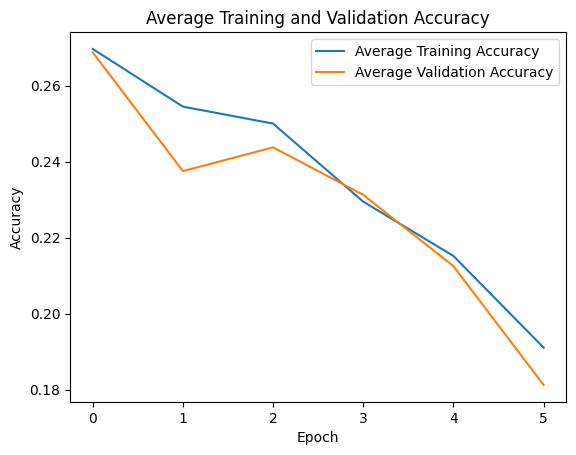

In [30]:
# Accuracy Function

if not cross_validation:
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

if cross_validation:
    plt.plot(sum(accuracy)/len(accuracy), label='Average Training Accuracy')
    plt.plot(sum(val_accuracy)/len(val_accuracy), label='Average Validation Accuracy')
    plt.title('Average Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

C:\Users\anany\AppData\Local\Temp\ipykernel_22588\1971521336.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation = 45, ha = "right")
C:\Users\anany\AppData\Local\Temp\ipykernel_22588\1971521336.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


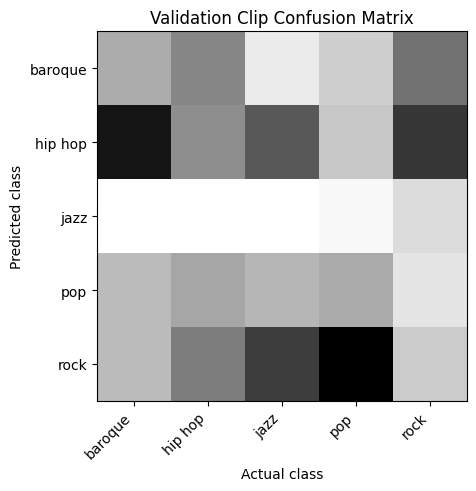

In [31]:
# Validation Clip Confusion Matrix

if cross_validation:

    fig, ax = plt.subplots()
    ax.imshow(norm_val_clip_confusion, cmap = "gray_r")

    labels = [item.get_text() for item in ax.get_yticklabels()]
    for i in range(1, len(labels) - 1):
        labels[i] = genre_list[i - 1]

    ax.set_xticklabels(labels, rotation = 45, ha = "right")
    ax.set_yticklabels(labels)

    ax.set_xlabel("Actual class")
    ax.set_ylabel("Predicted class")
    ax.set_title("Validation Clip Confusion Matrix")

    plt.show()

C:\Users\anany\AppData\Local\Temp\ipykernel_22588\4017982822.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation = 45, ha = "right")
C:\Users\anany\AppData\Local\Temp\ipykernel_22588\4017982822.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


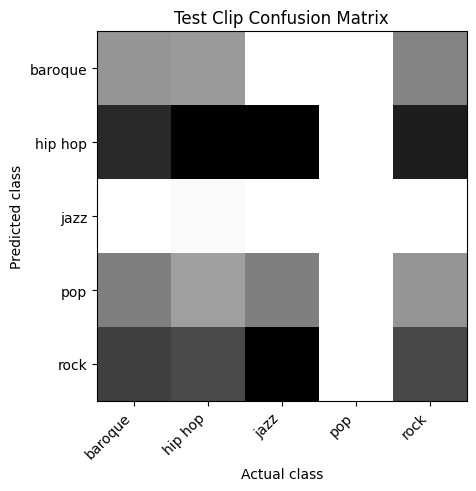

In [32]:
# Test Clip Confusion Matrix

fig, ax = plt.subplots()
ax.imshow(norm_test_clip_confusion, cmap = "gray_r")

labels = [item.get_text() for item in ax.get_yticklabels()]
for i in range(1, len(labels) - 1):
    labels[i] = genre_list[i - 1]

ax.set_xticklabels(labels, rotation = 45, ha = "right")
ax.set_yticklabels(labels)

ax.set_xlabel("Actual class")
ax.set_ylabel("Predicted class")
ax.set_title("Test Clip Confusion Matrix")

plt.show()

In [33]:
print(norm_test_clip_confusion)

[[0.16666667 0.15833333 0.                nan 0.19333333]
 [0.33333333 0.4        0.4               nan 0.35333333]
 [0.         0.00833333 0.                nan 0.        ]
 [0.2        0.15       0.2               nan 0.16666667]
 [0.3        0.28333333 0.4               nan 0.28666667]]


In [ ]:
get_confusion_matrix()

In [34]:
print(test_clip_confusion)

[[10. 19.  0.  0. 29.]
 [20. 48. 16.  0. 53.]
 [ 0.  1.  0.  0.  0.]
 [12. 18.  8.  0. 25.]
 [18. 34. 16.  0. 43.]]


In [35]:
if cross_validation:
    print(norm_val_clip_confusion)

[[0.18333333 0.26785714 0.04411765 0.109375   0.30769231]
 [0.51666667 0.25       0.36764706 0.125      0.44230769]
 [0.         0.         0.         0.015625   0.07692308]
 [0.15       0.19642857 0.16176471 0.1875     0.05769231]
 [0.15       0.28571429 0.42647059 0.5625     0.11538462]]


In [36]:
if cross_validation:
    print(val_clip_confusion)

[[11. 15.  3.  7. 16.]
 [31. 14. 25.  8. 23.]
 [ 0.  0.  0.  1.  4.]
 [ 9. 11. 11. 12.  3.]
 [ 9. 16. 29. 36.  6.]]


In [37]:
'''def play(id):
    info = id.split('_')
    song_id = info[0]
    channel = int(info[1][-1])
    start_time = info[2]
    end_time = info[3]

    filepath = audio_dict[song_id]
    y, sr = librosa.load(filepath)

    audio_segment = y[int(float(start_time) * sr) : int(float(end_time) * sr)]

    return Audio(audio_segment, rate = sr)'''

In [38]:
'''def classified_as(id_list, pred_classes, actual_classes, pred_class, actual_class):
    output = []
    for i in range(len(id_list)):
        id = id_list[i]
        pred = pred_classes[i]
        actual = actual_classes[i]
        if (pred == pred_class):
            if (actual == actual_class):
                output.append(id)
    
    return output  '''

In [39]:
c = classified_as(test_clip_ids, test_clip_pred_classes, test_clip_actual_classes, 0, 0)

if (len(c) != 0):
    example = random.randint(0, len(c) - 1)
    print(c[example])
    print(audio_dict[c[example][:4]])
    display(play(c[example]))
else:
    print("No such clips.")

No such clips.


# ANALYSIS

PLOTS

In [40]:
'''def get_song_votes(song_ids, clip_ids, clip_vote_array):
    song_vote_array = np.zeros((len(song_ids), len(clip_vote_array[0])))
    for i in range(len(clip_ids)):
        clip_id = clip_ids[i]
        song_id = clip_id.split('_')[0]
        index = song_ids.index(song_id)
        song_vote_array[index] = song_vote_array[index] + clip_vote_array[i]
    
    return song_vote_array'''

In [41]:
if cross_validation:
    val_song_vote_array = get_song_votes(val_song_ids, val_clip_ids, val_clip_vote_array)
    val_song_pred_classes = val_song_vote_array.argmax(axis=1)
    val_song_actual_classes = get_labels(val_song_ids, label_list)
    val_song_confusion = np.zeros((len(label_list), len(label_list)))

    for i in range(len(val_song_pred_classes)):
        val_song_confusion[val_song_pred_classes[i]][val_song_actual_classes[i]] += 1
    
    norm_val_song_confusion = np.zeros((len(label_list), len(label_list)))

    for i in range(len(label_list)):
        norm_val_song_confusion[:, i] = val_song_confusion[:, i]/sum(val_song_confusion[:, i])


test_song_vote_array = get_song_votes(test_song_ids, test_clip_ids, test_clip_vote_array)
test_song_pred_classes = test_song_vote_array.argmax(axis=1)
test_song_actual_classes = get_labels(test_song_ids, label_list)
test_song_confusion = np.zeros((len(label_list), len(label_list)))

for i in range(len(test_song_pred_classes)):
    test_song_confusion[test_song_pred_classes[i]][test_song_actual_classes[i]] += 1

norm_test_song_confusion = np.zeros((len(label_list), len(label_list)))

for i in range(len(label_list)):
    norm_test_song_confusion[:, i] = test_song_confusion[:, i]/sum(test_song_confusion[:, i])


C:\Users\anany\AppData\Local\Temp\ipykernel_22588\2317508874.py:13: RuntimeWarning: invalid value encountered in divide
  norm_val_song_confusion[:, i] = val_song_confusion[:, i]/sum(val_song_confusion[:, i])
C:\Users\anany\AppData\Local\Temp\ipykernel_22588\2317508874.py:27: RuntimeWarning: invalid value encountered in divide
  norm_test_song_confusion[:, i] = test_song_confusion[:, i]/sum(test_song_confusion[:, i])


In [42]:
val_clip_vote_array.argmax(axis=1)

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 3, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       3, 4, 4, 4, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4,
       4, 4, 3, 4, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 4, 0, 4, 4, 4, 0, 1], d

In [43]:
test_song_actual_classes

array([[1],
       [0],
       [4],
       [1],
       [4],
       [2],
       [4],
       [0],
       [1],
       [4]])

In [44]:
test_clip_vote_array

array([[1., 2., 0., 1., 1.],
       [1., 2., 0., 1., 1.],
       [1., 2., 0., 1., 1.],
       [1., 2., 0., 1., 1.],
       [1., 2., 0., 1., 1.],
       [1., 2., 0., 1., 1.],
       [1., 2., 0., 1., 1.],
       [1., 2., 0., 1., 1.],
       [1., 1., 0., 1., 2.],
       [1., 2., 0., 1., 1.],
       [0., 2., 0., 2., 1.],
       [1., 1., 0., 1., 2.],
       [1., 2., 0., 1., 1.],
       [0., 2., 0., 2., 1.],
       [1., 1., 0., 1., 2.],
       [1., 2., 0., 0., 2.],
       [1., 2., 0., 0., 2.],
       [1., 2., 0., 0., 2.],
       [1., 2., 0., 1., 1.],
       [0., 2., 0., 1., 2.],
       [1., 2., 0., 0., 2.],
       [1., 2., 0., 0., 2.],
       [0., 2., 1., 0., 2.],
       [1., 2., 0., 0., 2.],
       [1., 2., 0., 0., 2.],
       [1., 2., 0., 1., 1.],
       [1., 2., 0., 0., 2.],
       [1., 2., 0., 0., 2.],
       [1., 2., 0., 0., 2.],
       [1., 2., 0., 1., 1.],
       [1., 2., 0., 1., 1.],
       [1., 2., 0., 1., 1.],
       [1., 2., 0., 1., 1.],
       [1., 2., 0., 1., 1.],
       [1., 2.

In [45]:
get_song_votes(test_song_ids, test_clip_ids, test_clip_vote_array)

array([[ 8., 16.,  0.,  8.,  8.],
       [ 4., 10.,  0.,  8.,  8.],
       [ 7., 15.,  0.,  3., 15.],
       [ 7., 16.,  1.,  2., 14.],
       [ 8., 16.,  0.,  6., 10.],
       [ 0., 16.,  0.,  8., 16.],
       [10., 14.,  0.,  8.,  8.],
       [ 6., 10.,  0.,  4., 10.],
       [ 4., 16.,  0.,  8., 12.],
       [ 4.,  8.,  0.,  8., 10.]])

C:\Users\anany\AppData\Local\Temp\ipykernel_22588\3365749478.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation = 45, ha = "right")
C:\Users\anany\AppData\Local\Temp\ipykernel_22588\3365749478.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


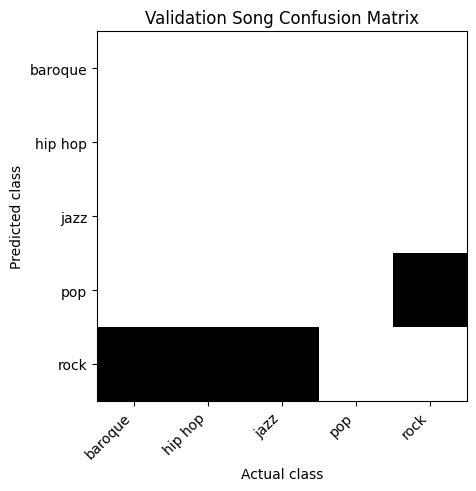

In [46]:
# Validation Song Confusion Matrix

if cross_validation:
    fig, ax = plt.subplots()
    ax.imshow(norm_val_song_confusion, cmap = "gray_r")

    labels = [item.get_text() for item in ax.get_yticklabels()]
    for i in range(1, len(labels) - 1):
        labels[i] = genre_list[i - 1]

    ax.set_xticklabels(labels, rotation = 45, ha = "right")
    ax.set_yticklabels(labels)

    ax.set_xlabel("Actual class")
    ax.set_ylabel("Predicted class")
    ax.set_title("Validation Song Confusion Matrix")

    plt.show()

C:\Users\anany\AppData\Local\Temp\ipykernel_22588\3690557277.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation = 45, ha = "right")
C:\Users\anany\AppData\Local\Temp\ipykernel_22588\3690557277.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


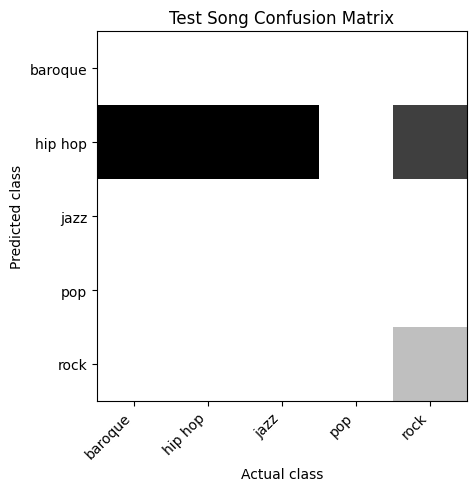

In [47]:
# Test Song Confusion Matrix

fig, ax = plt.subplots()
ax.imshow(norm_test_song_confusion, cmap = "gray_r")

labels = [item.get_text() for item in ax.get_yticklabels()]
for i in range(1, len(labels) - 1):
    labels[i] = genre_list[i - 1]

ax.set_xticklabels(labels, rotation = 45, ha = "right")
ax.set_yticklabels(labels)

ax.set_xlabel("Actual class")
ax.set_ylabel("Predicted class")
ax.set_title("Test Song Confusion Matrix")

plt.show()

In [48]:
test_song_confusion

array([[0., 0., 0., 0., 0.],
       [2., 3., 1., 0., 3.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [49]:
get_confusion_matrix(test_song_ids, test_song_vote_array, label_list)

array([[10., 19.,  0.,  0., 29.],
       [20., 48., 16.,  0., 53.],
       [ 0.,  1.,  0.,  0.,  0.],
       [12., 18.,  8.,  0., 25.],
       [18., 34., 16.,  0., 43.]])

In [ ]:
# SONG CONFUSION MATRIX

# ~~~~~~~~~~~~~~

In [ ]:
clip_vote_dict = {}
song_clip_dict = {}

In [ ]:
for id in list(audio_dict.keys()):
    # np.where(np.char.find(test_ids, 'r009') >= 0) ids where 'r009' appears in the string
    if id in test_set:
        song_clip_dict[id] = test_ids[np.where(np.char.find(test_ids, id) >= 0)]
    else:
        #song_clip_dict[id] = train_ids[np.where(np.char.find(train_ids, id) >= 0)]
        pass

In [ ]:
y_pred_class_onehot = np.eye(len(genre_id.keys()))[y_pred_classes]

In [ ]:
for i in range(len(test_ids)):
    id = test_ids[i]
    if id not in clip_vote_dict.keys():
        clip_vote_dict[id] = np.zeros(len(genre_id.keys()))
    clip_vote_dict[id] = clip_vote_dict[id] + y_pred_class_onehot[i]
    

In [ ]:
song_vote_dict = {}

In [ ]:
for song_id in test_set:
    song_vote_dict[song_id] = np.zeros(len(genre_id.keys()))
    for clip_id in song_clip_dict[song_id]:
        song_vote_dict[song_id] = song_vote_dict[song_id] + clip_vote_dict[clip_id]

In [ ]:
for id in song_vote_dict:
    print("id: {0} pred {1} actual {2}   votes {3}".format(id, label_list[(np.argmax(song_vote_dict[id]))], id[0], song_vote_dict[id]))

In [ ]:
song_confusion = np.zeros((len(label_list), len(label_list)))

for id in song_vote_dict:
    prediction = np.argmax(song_vote_dict[id])
    actual = label_list.index(id[0])
    song_confusion[prediction][actual] += 1

for i in range(len(label_list)):
    if sum(song_confusion[:, i]) >= 0:
        song_confusion[:, i] = song_confusion[:, i]/sum(song_confusion[:, i])

In [ ]:
fig, ax = plt.subplots()
ax.imshow(song_confusion, cmap = "gray_r")

labels = [item.get_text() for item in ax.get_yticklabels()]
for i in range(1, len(labels) - 1):
    labels[i] = genre_list[i - 1]

ax.set_xticklabels(labels, rotation = 45, ha = "right")
ax.set_yticklabels(labels)

ax.set_xlabel("Actual class")
ax.set_ylabel("Predicted class")
ax.set_title("Song Classification Matrix")

In [ ]:
def song_classifications(labels, prob_array):
    # TODO: get probability distributions for a song
    pass
    # label list genre list whatever whatever
    # do the argmax thing
    # output probdis = numpy array of size of genres
    # for each:
        # vote
    # divide by number of samples - maybe dont do this so you can add these for several runss


# agrmax output of this to get 

# WITH PYTORCH

In [ ]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.current_device())
print(torch.cuda.device(0))
print(torch.cuda.get_device_name(0))

# MY CNN

In [ ]:
from cnn.activation import Tanh, Sigmoid, ReLU
from cnn.convolutional import Convolutional
from cnn.dense import Dense
from cnn.loss import MSE, MSE_prime, binary_cross_entropy, binary_cross_entropy_prime
from cnn.nn import MNIST
from cnn.reshape import Reshape

In [ ]:
from keras.utils import np_utils


In [ ]:
t1 = np.array([[0, 0], [1, 1], [2, 2], [3, 3]])
t2 = np.array([0, 1, 2, 3])

indices = random.sample(range(len(t1)), len(t1))

t1 = t1[indices]
t2 = t2[indices]

print(t1)
print(t2)

In [ ]:
def preprocess_data(x, y, limit):
    #zero_index = np.where(y == 0)[0][:limit]
    #one_index = np.where(y == 1)[0][:limit]
    

    #all_indices = np.random.permutation(np.hstack((zero_index, one_index)))

    #x, y = x[all_indices], y[all_indices]

    #x = (x.reshape(len(x), 1, 28, 28)).astype("float32") / 255

    #y = np_utils.to_categorical(y)
    #y = y.reshape(len(y), 2, 1)

    return x, y

In [ ]:
y_train.reshape(len(y_train), 2, 1).shape

In [ ]:
x_train = x_train.reshape(len(x_train), 1, resize_dim, resize_dim)
x_test = x_test.reshape(len(x_test), 1, resize_dim, resize_dim)



In [ ]:
y_train = np_utils.to_categorical(y_train)
y_train = y_train.reshape(len(y_train), len(y_train[0]), 1)
y_test = np_utils.to_categorical(y_test)
y_test = y_test.reshape(len(y_test), len(y_test[0]), 1)

In [ ]:

train_indices = random.sample(range(len(x_train)), len(x_train))
test_indices = random.sample(range(len(x_test)), len(x_test))

x_train = x_train[train_indices]
y_train = y_train[train_indices]

x_test = x_test[test_indices]
y_test = y_test[test_indices]

In [ ]:
t1 = [[0, 0], [1, 1], [2, 2]]
t2 = [0, 1, 2]

zip(t1, t2)

In [ ]:
network = [
    Convolutional((1, resize_dim, resize_dim), 3, 5),
    Sigmoid(),
    Reshape((5, resize_dim - 2, resize_dim - 2), (5 * (resize_dim - 2) * (resize_dim - 2), 1)),
    Dense(5*(resize_dim - 2)*(resize_dim - 2), 100),
    Sigmoid(),
    Dense(100, 5),
    Sigmoid()
]

In [ ]:
from cnn.pooling import MaxPooling
# TODO: test forward

In [ ]:
arr = np.random.randint(20, size=(4, 4))

pool_shape = (2, 2)

output = np.zeros((int(arr.shape[0]/pool_shape[0]), int(arr.shape[1]/pool_shape[1])))

i, j = 0, 0

for i in range(output.shape[0]):
    for j in range(output.shape[1]):
        temp = np.max(arr[i*pool_shape[0]:(i+1)*pool_shape[0], j*pool_shape[1]:j*pool_shape[1]+2])
        output[i][j] = temp#np.max(arr[i*pool_shape[0]:(i+1)*pool_shape[0]][j*pool_shape[1]:(j+1)*pool_shape[1]])

print(arr)
print(output)

In [ ]:

epochs = 10
learning_rate = 0.01

for e in range(epochs):
    error = 0

    temp = zip(x_train, y_train)
    for x, y in zip(x_train, y_train):
        output = x
        for layer in network:
            output = layer.forward(output)
        
        error += MSE(y, output)

        grad = MSE_prime(y, output)
        for layer in reversed(network):
            grad = layer.backward(grad, learning_rate)
    
    error /= len(x_train)
    print(f"{e + 1}/{epochs}, error = {error}")


    correct = 0
    total = 0

    for x, y in zip(x_test, y_test):
        output = x
        for layer in network:
            output = layer.forward(output)
        print(f"     pred: {np.argmax(output)}, true: {np.argmax(y)}")
        total += 1
        if np.argmax(output) == np.argmax(y):
            correct += 1
    print(f"correct: {correct}, total: {total}\n\n")


correct = 0
total = 0

for x, y in zip(x_test, y_test):
    output = x
    for layer in network:
        output = layer.forward(output)
    print(f"pred: {np.argmax(output)}, true: {np.argmax(y)}")
    total += 1
    if np.argmax(output) == np.argmax(y):
        correct += 1
print(f"correct: {correct}, total: {total}")

In [ ]:
audio_folderpath = "C:/Users/anany/Cambridge/Part II Project/data/raw"
image_folderpath = "C:/Users/anany\Cambridge\Part II Project\data\images"
split_ratio = 0.75
image_type = "spectrogram"
clip_length = 10
shift_length = 500
resize_dim = 28

In [ ]:
'''temp = train_imgs.reshape((74, 1, 28, 28, 4))

temp.shape'''

In [ ]:
'''network = [
        Convolutional(input_shape=(1, 28, 28, 4), kernel_size=3, depth=5), # output_shape=()
        Sigmoid()
    ]'''

In [ ]:
'''c = Convolutional(input_shape=(1, 28, 28, 4), kernel_size=3, depth=5), # output_shape=()
'''

In [ ]:
'''epochs = 20
learning_rate = 0.1

for e in range(epochs):
    error = 0

    temp = zip(x_train, y_train)
    for x, y in zip(x_train, y_train):
        output = x
        for layer in network:
            output = layer.forward(output)
        
        error += binary_cross_entropy(y, output)

        grad = binary_cross_entropy_prime(y, output)
        for layer in reversed(network):
            grad = layer.backward(grad, learning_rate)
    
    error /= len(x_train)
    print(f"{e + 1}/{epochs}, error = {error}")'''

In [ ]:
'''MNIST()'''

In [ ]:
'''arr = np.array([[[0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3]], [[0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3]]])
# 2 3 4

new_arr = np.moveaxis(arr, 2, 0)
# 4 3 2

new_arr[:3]'''

In [ ]:
'''arr'''

In [ ]:
'''arr = train_imgs[0]

new_arr = np.moveaxis(arr, -1, 0)

new_arr'''

In [ ]:
MNIST()